In [ ]:
!pip install pytesseract
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (24.1 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

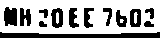

Detected License Plate Number: MH 20EE 7602


In [ ]:
# pytesseract: This is a Python wrapper for Tesseract, an OCR (Optical Character Recognition) engine that reads text from images.
# cv2_imshow: A function to display images in Google Colab.

import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('car.jpg')

# Step 1: Denoise the image
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Image dimensions
height, width = image.shape[:2]
top_left_x, top_left_y = 97, 127
bottom_right_x, bottom_right_y = 177, 146

# Step 3: Crop the license plate area if within bounds
if 0 <= top_left_x < width and 0 <= bottom_right_x <= width and 0 <= top_left_y < height and 0 <= bottom_right_y < height:
    # Crop the image to the license plate region
    cropped_license_plate = gray[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

    # Step 4: Resize the cropped image for better detection
    resized_plate = cv2.resize(cropped_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    # Step 5: Apply Morphological Transformations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph_plate = cv2.morphologyEx(resized_plate, cv2.MORPH_CLOSE, kernel)

    # Step 6: Apply Thresholding for better OCR accuracy
    _, thresholded_plate = cv2.threshold(morph_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the processed license plate region
    cv2_imshow(thresholded_plate)

    # Step 7: Use pytesseract to read the text from the thresholded license plate
    # Use config to improve detection (allowing uppercase letters, numbers)
    custom_config = r'--oem 3 --psm 8 outputbase=digits'
    text = pytesseract.image_to_string(thresholded_plate, config=custom_config)

    # Print the detected text
    print("Detected License Plate Number:", text.strip())
else:
    print("Specified coordinates are out of image bounds.")


fastNlMeansDenoisingColored: This method reduces noise in the image while preserving color. Noise can make it difficult for OCR to recognize text. The parameters (10, 10, 7, 21) control how aggressively noise is reduced. Smaller values keep more detail but might leave some noise.
Converts the denoised color image to grayscale. OCR works better on single-channel (black and white) images, as it simplifies the data.
Crops the area of the image where the license plate is expected to be. The coordinates (top_left_x, top_left_y, etc.) define the rectangle around the plate.
Increases the size of the cropped image (doubles its dimensions). Resizing can make the text clearer and easier for OCR to recognize.
getStructuringElement: Creates a small rectangular kernel (or filter) of size 3x3.
morphologyEx: This applies a morphological operation. Here, MORPH_CLOSE is used, which fills small holes in the text. This is helpful for connecting letters that might be slightly separated or making the text more solid for better recognition.
threshold: Converts the grayscale image to a binary image (black and white). This helps to create a clear distinction between the text (white) and the background (black).
THRESH_BINARY + THRESH_OTSU: This method automatically finds the optimal threshold value to separate foreground from background, adapting to lighting conditions in the image.
Uses Tesseract to read text from the processed binary image. The config parameter is set to optimize detection for digits and uppercase letters commonly found on license plates.


Denoising helps reduce unwanted noise in the image, making it clearer.
Grayscale conversion simplifies the image for text recognition.
Cropping isolates the license plate area for focused processing.
Resizing enlarges the text, aiding OCR.
Morphological operations connect and strengthen text features.
Thresholding creates a clear black-and-white image, enhancing text visibility.
OCR reads the processed image to extract the text.